# MODEL KLASIFIKASI LINEAR

In [32]:
# Mengimport library yang digunakan
import sys
import numpy as np
!pip install numpy
!pip install pandas
!pip install -U scikit-learn scipy matplotlib
!pip install matplotlib
import pandas as pd
!{sys.executable} -m pip install tabulate
from tabulate import tabulate
from matplotlib import rcParams
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
# Membaca file data
filename = "DataClassification.txt"

In [34]:
# Mengubah file data teks menjadi dataframe 
data = pd.read_csv(filename, sep='\t')

In [35]:
# Menampilkan dataframe
data

,x,Y,LABEL
0,1.0000,399.6550,1
1,5.8293,428.5600,1
2,10.6585,266.0618,1
3,15.4878,376.9293,1
4,20.3171,383.6759,1
5,25.1463,463.8939,1
6,29.9756,502.8094,1
7,34.8049,536.4060,1
8,39.6341,412.8075,1
9,44.4634,553.9108,1


In [36]:
# Membangun Fungsi Linear Regression
class LinearRegression:
    
    def __init__(self):
        self.b0 = None     # b0 = populasi Y-Intercept
        self.b1 = None     # b1 = populasi Slope

    def fit(self, x, Y):   # Tahapan untuk training Model
        ''' 
        Menghitung Y = b0 + b1x   
        '''
        numerator   = np.sum((x - np.mean(x))*(Y - np.mean(Y)) ) # Rumus untuk Menghitung Pembilang
        denominator = np.sum((x - np.mean(x))**2 )                # Rumus untuk Menghitung Penyebut
        self.b1     = numerator/denominator                       
        self.b0     = np.mean(Y) - self.b1*np.mean(x)              

    def predict(self, x): # Untuk menghitung prediksi nilai y dengan input X
        if not self.b0 or not self.b1:
            raise Exception('Silakan melakukan pemanggilan `LinearRegression.fit(X,y)` sebelum melakukan prediksi.')
        return self.b0 + self.b1*x

In [37]:
# Menginisialisasi Variabel
x = data.iloc[:,0]  # mendapatkan kolom x
Y = data.iloc[:,1]  # mendapatkan kolom Y
LABEL = data.iloc[:,2] # mendapatkan kolom LABEL
 
x1=[]; x2=[]; y1=[]; y2=[]

# Membagi koordinat berdasarkan LABEL
for i in range(0,len(x)):
   if str(LABEL[i])=='1':
        x1.append(x[i])
        y1.append(Y[i])
        tanda1='o'
        color1='blue'
   else:
        x2.append(x[i])
        y2.append(Y[i])
        tanda2='P'  
        color2='black'

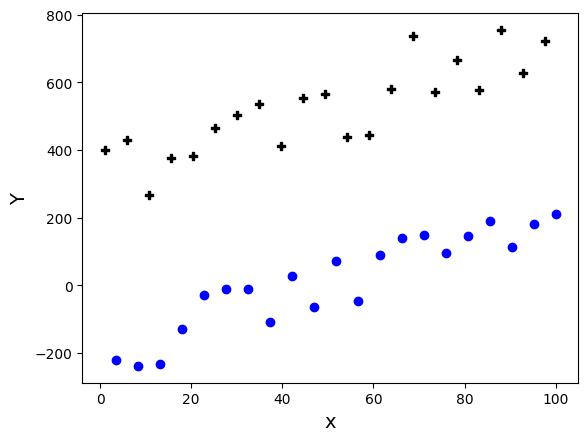

In [38]:
# Plotting koordinat (x1,y1) dan (x2,y2)
plt.scatter(x1,y1,marker=tanda2,c=color2)
plt.scatter(x2,y2,marker=tanda1, c=color1)
plt.xlabel('x', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [39]:
# Untuk Validasi, Data akan dibagi menjadi Training Data dan Testing Data Menggunakan Library sklearn
from sklearn.model_selection import train_test_split

# Data Testnya diset dengan nilai 20%
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size=0.2, random_state=42)

# Proses Training dan Testing :
model     = LinearRegression()    # Inisialisasi Proses
model.fit(x_train, Y_train)       # Proses Training dengan output b0 & b1
prediction     = model.predict(x_test) # Proses Prediksi dengan input X_test dan output y_prediction

In [40]:
# Menampilkan Koefisien b0 dan b1 dari Hasil Training
model.b0, model.b1

(104.55799567283731, 3.4929527754577983)

In [41]:
# Menampilkan Prediksi
prediction

25    183.958750
13    327.340270
8     242.998035
26    200.827267
4     175.524667
39    420.116589
19    428.550673
29    251.432468
30    268.300636
Name: x, dtype: float64

In [42]:
# menampilkan y_test yang nantinya data tersebut akan dibandingkan dengan prediction
Y_test

25    -27.7249
13    579.5092
8     412.8075
26     -9.8588
4     383.6759
39    113.8343
19    626.5285
29     29.1436
30    -62.8570
Name: Y, dtype: float64

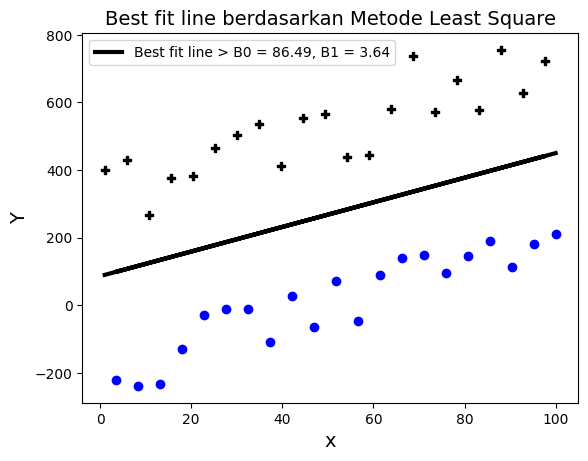

In [43]:
# Proses Validasi 
# 1. secara kualitatif menggunakan visualisasi
# 2. secara kuantitatif menggunakan RMSE

# 1. Kualitatif
# Visualisasi data menggunakan best fit line
model_all = LinearRegression()
model_all.fit(x,Y)                         # bangun kembali model berdasarkan semua data
predict_all = model_all.predict(x)         # membangun model prediksi

# parameter scatter plot
plt.scatter(x1,y1,marker=tanda2,c=color2)
plt.scatter(x2,y2,marker=tanda1, c=color1)
plt.plot(x, predict_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line berdasarkan Metode Least Square', size=14)
plt.xlabel('x', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # Menampilkan keterangan label pada Diagram Scatter Plot
plt.show()

In [44]:
# 2. Kuantitatif 
# nilai prediksi dilakukan validasi terhadap data testing menggunakan RMSE
from sklearn.metrics import mean_squared_error  # import rmse dari library sklearn
rmse = lambda Y, Y_pred: np.sqrt(mean_squared_error(Y, Y_pred))  
rmse(Y_test, prediction)

239.6830609933574

In [45]:
# Y = Persamaan Garis
# b0 dan b1 adalah variabel bebas
# b0 = populasi Y-Intercept
# b1 = populasi Slope
print("Persamaan Garis : Y = b0 + b1x")
print("Persamaan Garis yang Diperoleh dari Model ini adalah Y =",model.b0,"+",model.b1,"x") 

Persamaan Garis : Y = b0 + b1x
Persamaan Garis yang Diperoleh dari Model ini adalah Y = 104.55799567283731 + 3.4929527754577983 x


# MODEL KLASIFIKASI SVM

In [46]:
# Membaca file data
filename = "DataClassification.txt"

In [47]:
# Mengubah file data teks menjadi dataframe 
data = pd.read_csv(filename, sep='\t')
x = data.drop('LABEL', axis=1)
Y = data.iloc[:,2]

In [48]:
# Menampilkan data x yang terdiri dari nilai kolom x dan Y
x

,x,Y
0,1.0000,399.6550
1,5.8293,428.5600
2,10.6585,266.0618
3,15.4878,376.9293
4,20.3171,383.6759
5,25.1463,463.8939
6,29.9756,502.8094
7,34.8049,536.4060
8,39.6341,412.8075
9,44.4634,553.9108


In [49]:
#Menampilkan data Y yang merupakan label
Y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
Name: LABEL, dtype: int64

In [50]:
# Untuk Validasi, Datanya akan dibagi menjadi Training Data dan Testing Data Menggunakan Library sklearn
from sklearn.model_selection import train_test_split

# Data Testnya diset dengan nilai 20%
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size=0.2, random_state=42)

In [51]:
# Mengimport StandardScaler
from sklearn.preprocessing import StandardScaler
# mengatur skala input data
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [52]:
# Mengimport library svm model
from sklearn import svm
# Membangun SVM model
clf = svm.SVC(kernel='linear', C = 1.0) # Linear Kernel
# Melatih model dengan data training
clf.fit(x_train, Y_train)
# Melakukan prediksi untuk data testing
Y_pred = clf.predict(x_test)

In [53]:
# Menampilkan data Y_pred
Y_pred

array([2, 1, 1, 2, 1, 2, 1, 2, 2], dtype=int64)

In [54]:
# Menampilkan data Y_test
Y_test

25    2
13    1
8     1
26    2
4     1
39    2
19    1
29    2
30    2
Name: LABEL, dtype: int64

In [55]:
# Mengimport library accuracy score
from sklearn.metrics import accuracy_score
# Menampilkan akurasi dari model SVM
print(accuracy_score(Y_test, Y_pred))

1.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


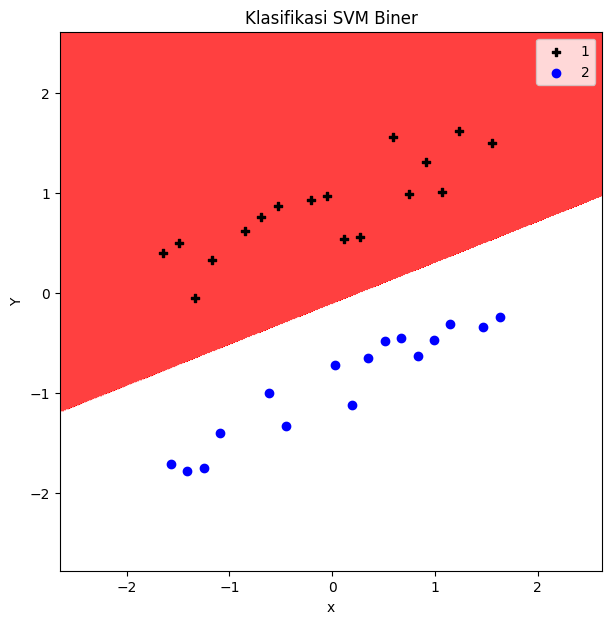

In [56]:
# Mengimport library untuk ploting diagram hasil validasi kualitatif model SVM
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Melakukan ploting diagram
plt.figure(figsize = (7,7))

# Menginisialisasi nilai input
x_set, Y_set = x_train, Y_train

# Melakukan ploting graf linear
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, clf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, 
             cmap = ListedColormap(('red', 'white')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
tanda1='o'
tanda2='P'

# Melakukan ploting nilai pada scattered graph
markers = ["P","o"]
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(x_set[Y_set == j, 0], x_set[Y_set == j, 1], c = ListedColormap(('black', 'blue'))(i), label = j, 
                marker=markers[i])
    
# Memberikan label pada diagram
plt.title('Klasifikasi SVM Biner')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.show()